# Problem 1: Feedback Analysis

The leadership wants to know general sentiments from the feedbacks of employees and the areas where they are doing good or needs improvement.  
 
Analyze the feedback comments provided as part of the dataset. Provide recommendations on what X should look to Start, Stop or Continue doing. 



In [1]:


import nltk  # Natural Language Tool Kit 
import os
import pandas as pd
import re  # library to clean data 
import numpy as np
import yaml



Reading the Feedback and Cleaning NaN's

In [2]:
path="D:/NLP/Asst/"
os.chdir( path )

########Reading the data and basic data cleaning###########
feedback_data = pd.read_csv('Feedbacks.csv',header=None, keep_default_na=False)
feedback_data.columns = ['Review']

feedback_data.shape
feedback_data.dropna()
feedback_data = feedback_data[feedback_data['Review']!='nan']
feedback_data.shape


(1996, 1)

VADER (Valence Aware Dictionary and sEntiment Reasoner)is a lexicon and rule-based sentiment analysis tool
which is specifically understand the social media sentiment as either positive or negative. 

Advantage:

1. Works exceedingly well on social media type text & Figurative Text 
2. No training dataset required 

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
# function to find the sentiment score 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral") 
    
    return sentiment_dict


In [4]:
##############Get the score##########################
feedback_data['Pos_Score'] = 0.0
feedback_data['Neg_Score'] = 0.0
feedback_data['Neu_Score'] = 0.0
feedback_data['sentiment_category_1'] = 0


for sentence in feedback_data['Review']:
      # function calling 
    scores = sentiment_scores(sentence)
    feedback_data.loc[(feedback_data['Review'] == sentence) , ['Pos_Score']] = scores['pos']
    feedback_data.loc[(feedback_data['Review'] == sentence) , ['Neg_Score']] = scores['neg']
    feedback_data.loc[(feedback_data['Review'] == sentence) , ['Neu_Score']] = scores['neu']
    feedback_data.loc[(feedback_data['Review'] == sentence) , ['sentiment_category_1']] = 1 if scores['compound'] >= 0.05 else 0 if scores['compound'] <= -0.05 else -1


Overall sentiment dictionary is :  {'neg': 0.0, 'compound': 0.5106, 'neu': 0.602, 'pos': 0.398}
sentence was rated as  0.0 % Negative
sentence was rated as  60.199999999999996 % Neutral
sentence was rated as  39.800000000000004 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.0, 'compound': 0.0, 'neu': 1.0, 'pos': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is :  {'neg': 0.0, 'compound': 0.945, 'neu': 0.707, 'pos': 0.293}
sentence was rated as  0.0 % Negative
sentence was rated as  70.7 % Neutral
sentence was rated as  29.299999999999997 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.0, 'compound': 0.9643, 'neu': 0.499, 'pos': 0.501}
sentence was rated as  0.0 % Negative
sentence was rated as  49.9 % Neutral
sentence was rated as  50.1 % Positive
Sentence Overall R

The pos, neg, neu scores are ratios for proportion of text that fall in each category. 
https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vaderSentiment.py

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual 
information. Subjectivity is also a float which lies in the range of [0,1].

In [6]:
from textblob import TextBlob

feedback_data['polarity'] = 0.0
feedback_data['subjectivity'] = 0.0
feedback_data['sentiment_category_2'] = 0


for sentence in feedback_data['Review']:
      # function calling 
    blob = TextBlob(sentence)
    feedback_data.loc[(feedback_data['Review'] == sentence) , ['polarity']] = blob.sentiment[0]
    feedback_data.loc[(feedback_data['Review'] == sentence) , ['subjectivity']] = blob.sentiment[1]
    feedback_data.loc[(feedback_data['Review'] == sentence) , ['sentiment_category_2']] = 1 if blob.sentiment[0] >= 0 else 0
    print(sentence)
    print(blob.sentiment)

    

feedback_data.head(1)

fun work most of the time
Sentiment(polarity=0.4, subjectivity=0.35)
Very Little Work Life Balance
Sentiment(polarity=-0.24375000000000002, subjectivity=0.65)
organizations is an amazing place to work, learn and grow - quickly. Your peers are best in class, and you will learn more in one year than you will at other companies in 10 years. organizations pays well through salary, bonus, and most importantly - stock.
Sentiment(polarity=0.45833333333333337, subjectivity=0.5821428571428572)
Bright and engaging people, amazing financial and non-financial benefits, healthy work life balance. Easily the biggest advantage of working at organization is the people; extremely intelligent, team oriented, and genuine.
Sentiment(polarity=0.4791666666666667, subjectivity=0.6416666666666667)
perks (lots of free stuff)
Sentiment(polarity=0.4, subjectivity=0.8)
If you aren't in shape it gets tough and you just become physically and mentally exhausted. It is a lot of walking.
Sentiment(polarity=-0.26296296

,Review,Pos_Score,Neg_Score,Neu_Score,sentiment_category_1,polarity,subjectivity,sentiment_category_2
0,fun work most of the time,0.398,0.0,0.602,1,0.4,0.35,1


In [7]:
feedback_data.head(1)

,Review,Pos_Score,Neg_Score,Neu_Score,sentiment_category_1,polarity,subjectivity,sentiment_category_2
0,fun work most of the time,0.398,0.0,0.602,1,0.4,0.35,1


Using NLTK

Split the text into sentences, and each sentence into tokens
Add POS (Part Of Speech) tags to the Splitted text, using NLTK
Enrich the POS-tagged text with our own tags using dictionaries. These tags are in a different "semantic level" than POS-tags: "positive", "negative", "inverter", "incrementer" and "decrementer"
Implement some basic extraction rules over the tagged text, in form of python functions

Sentiment scores: it only counts positive and negative expressions and makes a sum, without taking into account that maybe some expressions are more positive or more negative than others.

  if 'inc' in previous_tags:
                token_score *= 2.0
            elif 'dec' in previous_tags:
                token_score /= 2.0
            elif 'inv' in previous_tags:
                token_score *= -1.0
        return sentence_score(sentence_tokens[1:], current_token, acum_score + token_score)

In [8]:
##############Get the sentiment_score##########################

class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input format: a paragraph of text
        output format: a list of lists of words.
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences


class POSTagger(object):
    def __init__(self):
        pass
        
    def pos_tag(self, sentences):
        pos = [nltk.pos_tag(sentence) for sentence in sentences]
        #adapt format
        pos = [[(word, word, [postag]) for (word, postag) in sentence] for sentence in pos]
        return pos



splitter = Splitter()
postagger = POSTagger()




class DictionaryTagger(object):
    def __init__(self, dictionary_paths):
        files = [open(path, 'r') for path in dictionary_paths]
        dictionaries = [yaml.load(dict_file) for dict_file in files]
        map(lambda x: x.close(), files)
        self.dictionary = {}
        self.max_key_size = 0
        for curr_dict in dictionaries:
            for key in curr_dict:
                if key in self.dictionary:
                    self.dictionary[key].extend(curr_dict[key])
                else:
                    self.dictionary[key] = curr_dict[key]
                    self.max_key_size = max(self.max_key_size, len(key))

    def tag(self, postagged_sentences):
        return [self.tag_sentence(sentence) for sentence in postagged_sentences]

    def tag_sentence(self, sentence, tag_with_lemmas=False):
        """
        the result is only one tagging of all the possible ones.
        The resulting tagging is determined by these two priority rules:
            - longest matches have higher priority
            - search is made from left to right
        """
        tag_sentence = []
        N = len(sentence)
        if self.max_key_size == 0:
            self.max_key_size = N
        i = 0
        while (i < N):
            j = min(i + self.max_key_size, N) #avoid overflow
            tagged = False
            while (j > i):
                expression_form = ' '.join([word[0] for word in sentence[i:j]]).lower()
                expression_lemma = ' '.join([word[1] for word in sentence[i:j]]).lower()
                if tag_with_lemmas:
                    literal = expression_lemma
                else:
                    literal = expression_form
                if literal in self.dictionary:
                    #self.logger.debug("found: %s" % literal)
                    is_single_token = j - i == 1
                    original_position = i
                    i = j
                    taggings = [tag for tag in self.dictionary[literal]]
                    tagged_expression = (expression_form, expression_lemma, taggings)
                    if is_single_token: #if the tagged literal is a single token, conserve its previous taggings:
                        original_token_tagging = sentence[original_position][2]
                        tagged_expression[2].extend(original_token_tagging)
                    tag_sentence.append(tagged_expression)
                    tagged = True
                else:
                    j = j - 1
            if not tagged:
                tag_sentence.append(sentence[i])
                i += 1
        return tag_sentence
    
    
def value_of(sentiment):
    if sentiment == 'positive': return 1
    if sentiment == 'negative': return -1
    return 0

def sentiment_score(review):    
    return sum ([value_of(tag) for sentence in dict_tagged_sentences for token in sentence for tag in token[2]])


def sentence_score(sentence_tokens, previous_token, acum_score):    
    if not sentence_tokens:
        return acum_score
    else:
        current_token = sentence_tokens[0]
        tags = current_token[2]
        token_score = sum([value_of(tag) for tag in tags])
        if previous_token is not None:
            previous_tags = previous_token[2]
            if 'inc' in previous_tags:
                token_score *= 2.0
            elif 'dec' in previous_tags:
                token_score /= 2.0
        return sentence_score(sentence_tokens[1:], current_token, acum_score + token_score)

def sentiment_score(review):
    return sum([sentence_score(sentence, None, 0.0) for sentence in review])






In [9]:
dicttagger = DictionaryTagger([ 'positive.yml', 'inc.yml', 'dec.yml', 'negative.yml', 'inv.yml'])

In [10]:
sentance = feedback_data['Review'][37]
print("The statement is: " , sentance)
splitted_sentences = splitter.split(sentance)
pos_tagged_sentences = postagger.pos_tag(splitted_sentences)
dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
score = sentiment_score(dict_tagged_sentences)
print("The statement's Sentiment Score is: " , score)

The statement is:  Work/life balance.
The statement's Sentiment Score is:  1.0


In [11]:
feedback_data['sentiment_score'] =0

for sentence in feedback_data['Review']:
      # function calling 
    splitted_sentences = splitter.split(sentence)  
    pos_tagged_sentences = postagger.pos_tag(splitted_sentences)
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    score = sentiment_score(dict_tagged_sentences)
    feedback_data.loc[(feedback_data['Review'] == sentence) , ['sentiment_score']] = score
    print(sentence)
    print(score)


fun work most of the time
2.0
Very Little Work Life Balance
1.5
organizations is an amazing place to work, learn and grow - quickly. Your peers are best in class, and you will learn more in one year than you will at other companies in 10 years. organizations pays well through salary, bonus, and most importantly - stock.
5.0
Bright and engaging people, amazing financial and non-financial benefits, healthy work life balance. Easily the biggest advantage of working at organization is the people; extremely intelligent, team oriented, and genuine.
10.0
perks (lots of free stuff)
1.0
If you aren't in shape it gets tough and you just become physically and mentally exhausted. It is a lot of walking.
0.0
If working in Customer Service be aware that you'll get every type of customer imaginable.
0.0
Some metrics you get rated on are outside of your control. You still need to find solutions to those uncontrolled outcomes by creating new solutions to increase your culture of safety.
-1.0
As a virtu

In [12]:
feedback_data.columns

print(feedback_data[['sentiment_category_1','Review']].groupby(['sentiment_category_1']).agg(['count']))

print(feedback_data[['sentiment_category_2','Review']].groupby(['sentiment_category_2']).agg(['count']))

print(feedback_data[['sentiment_score','Review']].groupby(['sentiment_score']).agg(['count']))

                     Review
                      count
sentiment_category_1       
-1                      384
 0                      378
 1                     1234
                     Review
                      count
sentiment_category_2       
0                       388
1                      1608
                Review
                 count
sentiment_score       
-8.0                 1
-6.0                 1
-5.0                 1
-4.0                 3
-3.0                19
-2.0                65
-1.5                 1
-1.0               225
 0.0               442
 0.5                 1
 1.0               392
 1.5                 3
 2.0               345
 2.5                 2
 3.0               207
 4.0               124
 5.0                73
 5.5                 1
 6.0                40
 7.0                25
 8.0                16
 9.0                 4
 10.0                4
 12.0                1


In [13]:
feedback_data[['sentiment_category_1','sentiment_category_2','sentiment_score','Review']].groupby(['sentiment_category_1','sentiment_category_2','sentiment_score']).agg(['count'])



Review
                                                           count
sentiment_category_1 sentiment_category_2 sentiment_score       
-1                   0                    -1.0                24
                                           0.0                36
                                           0.5                 1
                                           1.0                17
                                           1.5                 1
                                           2.0                 4
                                           3.0                 1
                                           4.0                 1
                     1                    -3.0                 1
                                          -2.0                 4
                                          -1.0                29
                                           0.0               202
                                           1.0                41
                                           2.0                11
                                           3.0                10
                                           5.0                 1
 0                   0                    -8.0                 1
                                          -5.0                 1
                                          -4.0                 1
                                          -3.0                11
                                          -2.0                30
                                          -1.5                 1
                                          -1.0                86
                                           0.0                50
                                           1.0                17
                                           2.0                12
                                           3.0                 5
                                           4.0                 1
                     1                    -6.0                 1
                                          -4.0                 1
...                                                          ...
                                           3.0                 8
                                           4.0                 2
 1                   0                    -3.0                 1
                                          -2.0                 5
                                          -1.0                26
                                           0.0                19
                                           1.0                21
                                           1.5                 1
                                           2.0                10
                                           3.0                 2
                                           4.0                 2
                     1                    -4.0                 1
                                          -3.0                 2
                                          -2.0                 9
                                          -1.0                24
                                           0.0                88
                                           1.0               265
                                           1.5                 1
                                           2.0               293
                                           2.5                 2
                                           3.0               181
                                           4.0               118
                                           5.0                72
                                           5.5                 1
                                           6.0                40
                                           7.0                25
                                           8.0                16
                                           9.0                 4
                            

In [14]:
feedback_data.loc[(feedback_data['sentiment_category_1'] == -1) 
                  & (feedback_data['sentiment_category_2'] == 1) 
                  & (feedback_data['sentiment_score'] <=0) ]

,Review,Pos_Score,Neg_Score,Neu_Score,sentiment_category_1,polarity,subjectivity,sentiment_category_2,sentiment_score
6,If working in Customer Service be aware that y...,0.000,0.000,1.000,-1,0.250000,0.250000,1,0.0
35,work load can be taxing at times dues to requi...,0.000,0.000,1.000,-1,0.000000,0.000000,1,0.0
42,Downside are lazy people like most jobs and fa...,0.320,0.322,0.358,-1,0.125000,0.750000,1,-1.0
54,Inconsistent management of departments and ind...,0.000,0.000,1.000,-1,0.000000,0.000000,1,-1.0
62,Not a lot of hours,0.000,0.000,1.000,-1,0.000000,0.000000,1,0.0
71,"Managers that listen, plenty of O.T.",0.000,0.000,1.000,-1,0.000000,0.000000,1,0.0
97,Everyone comes to know EVERYONE!!!!,0.000,0.000,1.000,-1,0.000000,0.000000,1,0.0
107,Very results driven culture where you see see ...,0.000,0.000,1.000,-1,0.200000,0.300000,1,0.0
108,"high tax, high expense to live",0.000,0.000,1.000,-1,0.152121,0.526667,1,0.0
130,For this job I don't think there are any cons.,0.000,0.000,1.000,-1,0.000000,0.000000,1,-1.0


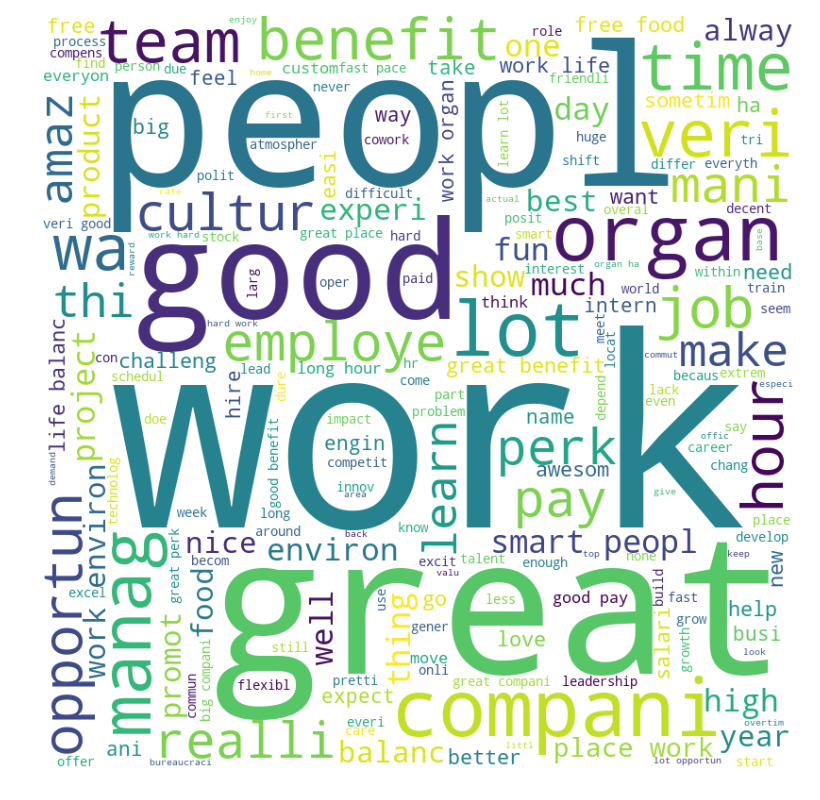

Employee are taking positively...
['abl' 'absolut' 'access' 'add' 'advantag' 'amaz' 'approach' 'area'
 'associ' 'aw' 'balanc' 'becaus' 'becom' 'benefit' 'biz' 'bodi' 'brand'
 'break' 'bu' 'call' 'care' 'career' 'ceil' 'center' 'challeng' 'chang'
 'chef' 'class' 'co' 'coach' 'codebas' 'collabor' 'collect' 'comfort'
 'commun' 'commut' 'compani' 'competit' 'concret' 'condit' 'conflict'
 'cool' 'couldv' 'cowork' 'cultur' 'custom' 'cut' 'daili' 'day' 'decent'
 'depart' 'depend' 'differ' 'disconnect' 'discov' 'dog' 'door' 'downsid'
 'dream' 'dure' 'dynam' 'easi' 'easili' 'embrac' 'employ' 'employe'
 'engin' 'entrepreneuri' 'enviro' 'environ' 'especi' 'everi' 'everyon'
 'everywher' 'exhaust' 'experi' 'extraordinari' 'extrem' 'faint' 'fair'
 'feel' 'fire' 'fish' 'floor' 'follow' 'food' 'foot' 'fortun' 'friendli'
 'fulfil' 'fun' 'gener' 'genuin' 'get' 'grade' 'grant' 'grow' 'guidanc'
 'ha' 'health' 'healthi' 'help' 'hire' 'hope' 'hour' 'hourli' 'howev' 'i'
 'idea' 'imagin' 'immedi' 'impact' 'im

In [19]:
#############Postive Sentences And Suggestion##############################
    
seperator = '\n'
feedback = feedback_data.loc[(feedback_data['sentiment_score'] >=0) , 'Review'] .tolist()
feedback_str = seperator.join(feedback)


# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(feedback_str)
# stemming of words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
words = [porter.stem(word) for word in tokens if word.lower().isalpha()]
#######Filter stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
feedback_words = [w for w in words if not w in stop_words]
# remove punctuation from each word & convert to lower case
import string
table = str.maketrans('', '', string.punctuation)
feedback_stripped = [w.translate(table).lower() for w in feedback_words]


seperator = ' '
feedback_cloud = seperator.join(feedback_stripped)

#######################Generating word clond####################
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(feedback_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#############Generate Recomendation ################################
import random
from textblob import Word
blob = TextBlob(feedback_cloud)
nouns = list()
print ("Employee are taking positively...")
listofwords = []
for word, tag in blob.tags[0:1000]:
    if tag == 'NN':
        nouns.append(word.lemmatize())

        for item in nouns:
            word = Word(item)
            listofwords.append(word)
        

print(np.unique(np.array(listofwords)))





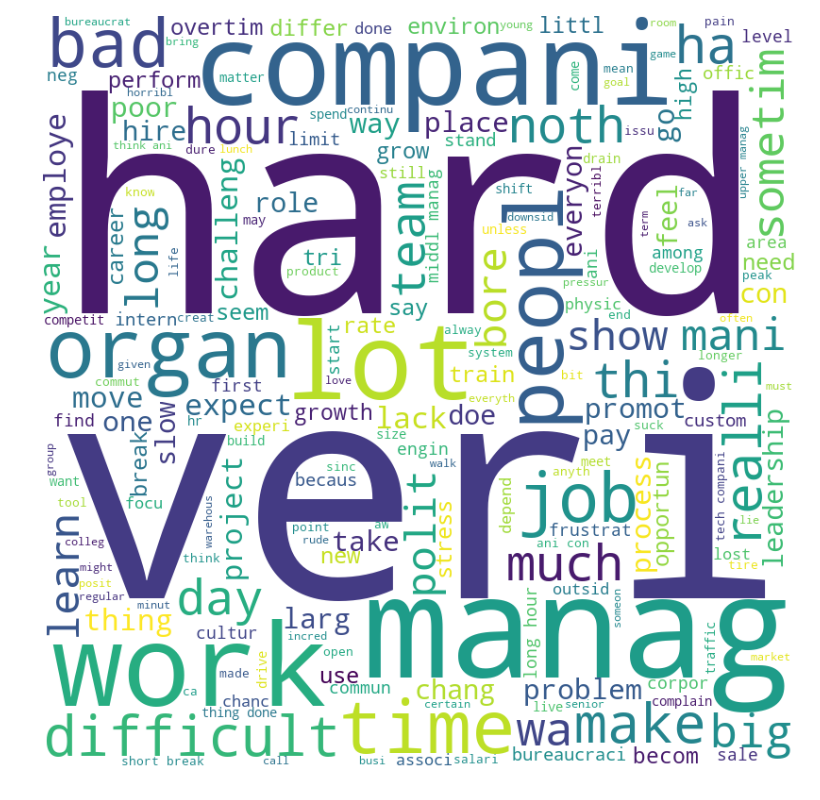

Employee are talking negatively about...
['abandon' 'affect' 'amaz' 'ask' 'begin' 'bore' 'bring' 'buy' 'caus'
 'challeng' 'contact' 'depend' 'deploy' 'develop' 'differ' 'do' 'drive'
 'end' 'engin' 'everi' 'everyon' 'expect' 'extent' 'feel' 'find' 'forget'
 'gain' 'get' 'go' 'grow' 'happen' 'hard' 'i' 'imagin' 'industri' 'keep'
 'kill' 'know' 'let' 'love' 'make' 'meet' 'middl' 'miss' 'move' 'need'
 'obtain' 'orient' 'perk' 'provid' 'put' 'reach' 'realli' 'relev' 'result'
 'rough' 'row' 'say' 'shift' 'show' 'slow' 'spend' 'stay' 'struggl' 'take'
 'tell' 'ten' 'think' 'throw' 'tire' 'ton' 'train' 'useless' 'vacat'
 'veri' 'win' 'work' 'worldwid']


In [20]:




#############Negative Sentences And Suggestion##############################
seperator = '\n'
feedback = feedback_data.loc[(feedback_data['sentiment_score'] <0) , 'Review'] .tolist()
feedback_str = seperator.join(feedback)


# split into words
tokens = word_tokenize(feedback_str)
# stemming of words
porter = PorterStemmer()
words = [porter.stem(word) for word in tokens if word.lower().isalpha()]
feedback_words = [w for w in words if not w in stop_words]
# remove punctuation from each word & convert to lower case
table = str.maketrans('', '', string.punctuation)
feedback_stripped = [w.translate(table).lower() for w in feedback_words]


seperator = ' '
feedback_cloud = seperator.join(feedback_stripped)

#######################Generating word clond####################
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(feedback_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#############Generate Recomendation ################################
import random
from textblob import Word
blob = TextBlob(feedback_cloud)
nouns = list()
print ("Employee are talking negatively about...")
listofwords = []
for word, tag in blob.tags:
    if tag == 'VB':
        nouns.append(word.lemmatize())

        for item in nouns:
            word = Word(item)
            listofwords.append(word)
        

print(np.unique(np.array(listofwords)))

